In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
analysis = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')

# Display a preview of the data
analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


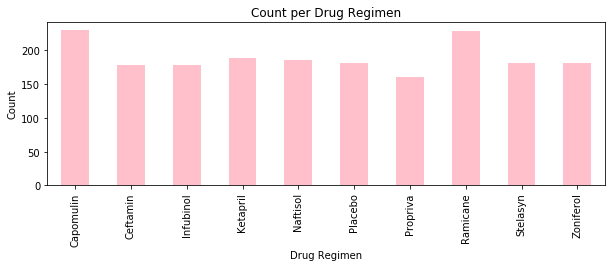

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints_df = pd.DataFrame(analysis.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = datapoints_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

regimen_datapoints.plot(kind="bar", color="pink",figsize=(10,3), legend=None)
plt.title("Count per Drug Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

plt.show()

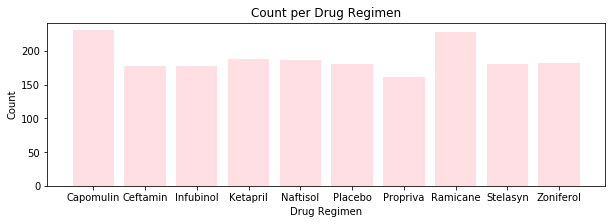

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimens = statistics_df.index.tolist()
drug_regimens

regimen_count = (analysis.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

x_axis = drug_regimens

plt.figure(figsize=(10,3))
plt.bar(x_axis, regimen_count, color="pink", alpha=0.5)
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

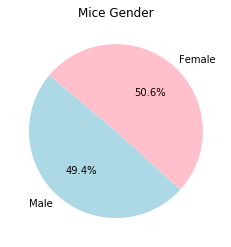

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(analysis.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

labels = ["Male", "Female"]
colors = ["LightBlue", "Pink"]
gender_df.plot(kind="pie", labels=labels, y= "Count", colors=colors, 
        autopct="%1.1f%%", legend=None, shadow=False, startangle=140)

plt.title("Mice Gender")
plt.ylabel("")
labels=None

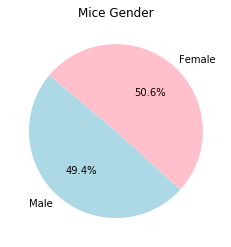

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (analysis.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Male", "Female"]
colors = ["LightBlue", "Pink"]
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

plt.title("Mice Gender")
plt.ylabel("")
labels=None

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens

# Set up 
cap_df = analysis.loc[analysis["Drug Regimen"] == "Capomulin",:]
ram_df = analysis.loc[analysis["Drug Regimen"] == "Ramicane", :]
inf_df = analysis.loc[analysis["Drug Regimen"] == "Infubinol", :]
ceft_df = analysis.loc[analysis["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

# Calculate the final tumor volume of each mouse: Capomuline

caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, analysis, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [17]:
# Capomulin: Calculate the IQR and quantitatively determine if there are any potential outliers.

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound}.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549.


In [19]:
# Calculate the final tumor volume of each mouse: Ramicane 

ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, analysis, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [23]:
# Ramicane: Calculate the IQR and quantitatively determine if there are any potential outliers

tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2}.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135.


In [24]:
# Calculate the final tumor volume of each mouse: Infubinol

inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, analysis, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [25]:
# Infubinol: Calculate the IQR and quantitatively determine if there are any potential outliers

tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3}.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001.


In [26]:
# Calculate the final tumor volume of each mouse: Ceftamin

ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, analysis, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [27]:
# Ceftamin: Calculate the IQR and quantitatively determine if there are any potential outliers

tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4}.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999.


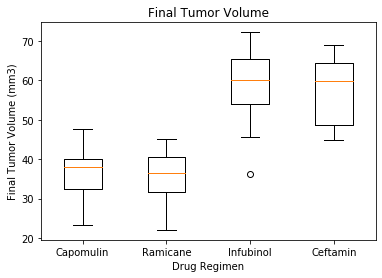

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

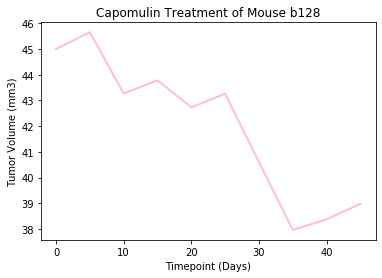

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

forline_df = cap_df.loc[cap_df["Mouse ID"] == "b128",:]
forline_df.head()

x_axisTP = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatment of Mouse b128')
plt.plot(x_axisTP, tumor_size,linewidth=2, markersize=12, color="pink")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

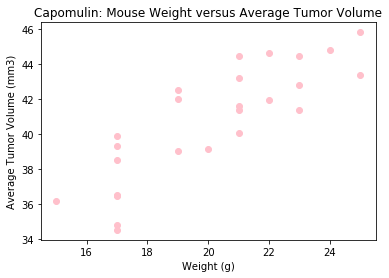

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'], color="pink")
plt.title('Capomulin: Mouse Weight versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [43]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

# Correlation Coefficient

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr} for the Capomulin regimen.")

The correlation between mouse weight and average tumor volume is 0.84 for the Capomulin regimen.


In [48]:
# Calculate the linear regression details

model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

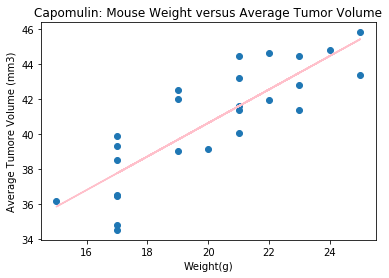

In [47]:
# Calculate the linear Regression model for mouse weight and average tumor volume for the Capomulin regimen

mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="pink")
plt.title('Capomulin: Mouse Weight versus Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()